# Tarea 3 - Pregunta 3 - Calidad de un vino
---
# Matías Araya - 201173082-8
# Claudia Hazard - 201404523-9

# a)
Se cargan los dos dataset en un único dataframe y se agrega una columna indicando si
es vino tinto o blanco.

In [58]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";") #Tinto
df_white = pd.read_csv("winequality-white.csv",sep=";") #Blanco
df = pd.concat([df_red,df_white], axis=0)
l=[]
for i in range(len(df_red)):
    l.append(0)
for i in range(len(df_white)):
    l.append(1)
df["tipo"]=l
print(len(df_red))
print(len(df_white))
print(max(df["quality"]))
df

1599
4898
9


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,0
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,0
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,0


El dataset consta 6497 datos de los cuales 1599 son de vino tinto y 4898 de vino blanco. Ademas tiene 13 columnas de los cuales 8 miden cantidad de algún elemento, ademas de los grados alcoholicos, la densidad, el pH, el tipo y lo que fue catalogado como su calidad siendo 9/10 la máxima calidad recibida.

# b)
Se aborda el problema como clasificación binaria cambiando la calidad a buena cuando es mayor a 5 y mala en otro caso. Luego se crean data de entrenamiento y prueba.

In [59]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] #Se califica como buena calidad cuando la calidad es mayor que 5.
del df["quality"]

In [60]:
#Se desordenan los datos.
df = df.sample(frac=1,random_state=10)
import pandas as pd
from sklearn.model_selection import train_test_split
y = df["good_quality"]
del df["good_quality"]
x = df


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=10)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=10)

# c)

Se entrena un Árbol de clasificación con la data de entrenamiento.

Se calcula la maxima altura del árbol con la que dará mejores resultados para el test de validación.

In [73]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import f1_score
def createThree(t):
    model= Tree(random_state=4)
    model.set_params(criterion='gini',splitter='best',max_depth=t)
    model.fit(x_train, y_train)
    y_true =  y_val
    y_pred =  model.predict(x_val)
    a=f1_score(y_true, y_pred, average='binary') # average="micro" average="macro" average='weighted'
    return a
maxi=0
for i in range(1,50):
    a=createThree(i)
    if  a > maxi:
        maxi=a
        save=i
print (a,save)

0.803664921466 8


Se obtiene que el árbol genera mejores resultados con una profundidad de 8

Se calcula el f1_score del data_test para el árbol con criterio gini con max_depth de 8.

In [77]:
def F1Score(t):
    model= Tree(random_state=10)
    model.set_params(criterion='gini',splitter='best',max_depth=t) 
    model.fit(x_train, y_train)
    y_true =  y_test
    y_pred =  model.predict(x_test)
    a=f1_score(y_true, y_pred, average='binary') # average="micro" average="macro" average='weighted'
    return a
F1Score(8)

0.80956761729530813

Se obtiene un resultado de 0.809

Se realiza lo anterior pero con criterio de entropía.

In [75]:
def createThree2(t):
    model= Tree(random_state=10)
    model.set_params(criterion='entropy',splitter='best',max_depth=t)
    model.fit(x_train, y_train)
    y_true =  y_val
    y_pred =  model.predict(x_val)
    a=f1_score(y_true, y_pred, average='binary') # average="micro" average="macro" average='weighted'
    return a
maxi=0
for i in range(1,50):
    a=createThree(i)
    if  a > maxi:
        maxi=a
        save=i
print (a,save)

0.803664921466 8


In [78]:
def F1Score2(t):
    model= Tree(random_state=10)
    model.set_params(criterion='entropy',splitter='best',max_depth=t)
    model.fit(x_train, y_train)
    y_true =  y_test
    y_pred =  model.predict(x_test)
    a=f1_score(y_true, y_pred, average='binary') # average="micro" average="macro" average='weighted'
    return a
F1Score2(8)

0.79545454545454541

Obteniendo un resultado de 0.795 en f1 Score para un árbol de decisión con profundidad 23 y criterio de entropía.

# d)
Se entrena un ensamblador de árboles de múltiples niveles mediante Random Forest, se varía la cantidad de árboles de decision utilizados para el ensamblado y se grafíca el F1-Score de entrenamiento según la cantidad de árboles.


In [79]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

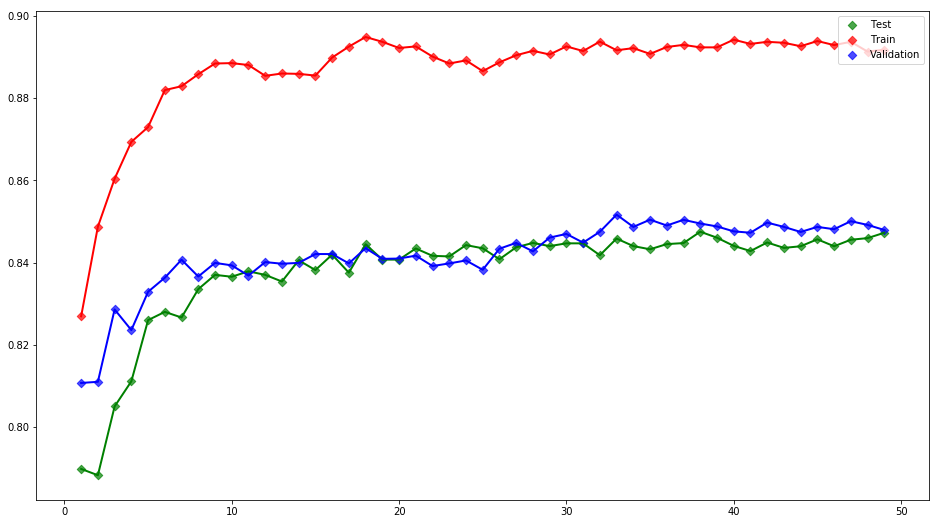

0.851692307692 33


In [89]:
def nEstimator(c1):
    model = RandomForestClassifier(n_estimators=c1, max_depth=8,n_jobs=-1,random_state=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_true=y_test
    val=f1_score(y_true, y_pred)
    y_pred=model.predict(x_train)
    y_true=y_train
    val2=f1_score(y_true,y_pred)
    y_pred=model.predict(x_val)
    y_true=y_val
    val3=f1_score(y_true,y_pred)
    return (val,val2,val3)
y=[]
x=[]
y2=[]
y3=[]
maxi=0
for i in range(1,50):
    s=nEstimator(i)
    y.append(s[0])
    y2.append(s[1])
    y3.append(s[2])
    x.append(i)
    if maxi<s[2]:
        maxi=s[2]
        num=i
        
plt.figure(figsize = (16, 9))
plt.plot(x,y, 'g', zorder=1, lw=2)
plt.scatter(x,y,marker="D", c="g", alpha=0.7,label="Test")
plt.plot(x,y2, 'r', zorder=1, lw=2)
plt.scatter(x,y2,marker="D", c="r", alpha=0.7,label="Train")
plt.plot(x,y3, 'b', zorder=1, lw=2)
plt.scatter(x,y3,marker="D", c="b", alpha=0.7,label="Validation")
plt.legend(loc='upper right')
plt.show()    
print(maxi,num)

Se observa que para la data de entrenamiento el F1-Score para 10 árboles de decisión se acerca a 0.9, mientras que para el data test y validation los valores del F1-Score se mantienen en un rango similar llegando a un maximo de 0.851 al realizar 33  árboles.

# e)
Se entrena un ensamblador de árboles de múltiples niveles utilizando AdaBoost, se varía la cantidad de árboles utilizados realizando un grafíco del F1-Score según la cantidad de árboles.


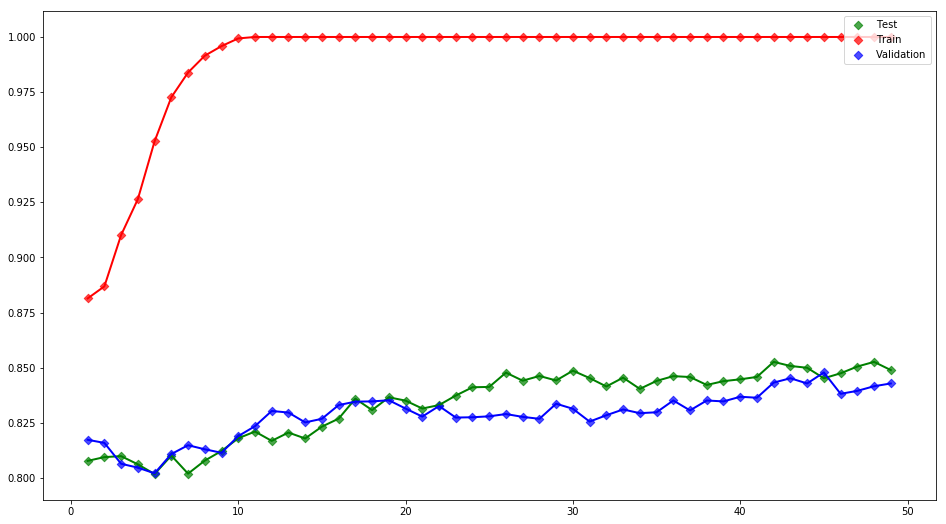

0.847839699436 45


In [90]:
from sklearn.ensemble import AdaBoostClassifier
def adaEstimator(c1):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=8,random_state=10), n_estimators=c1,random_state=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_true=y_test
    val=f1_score(y_true, y_pred)
    y_pred=model.predict(x_train)
    y_true=y_train
    val2=f1_score(y_true,y_pred)
    y_pred=model.predict(x_val)
    y_true=y_val
    val3=f1_score(y_true,y_pred)
    return (val,val2,val3)
y=[]
x=[]
y2=[]
y3=[]
maxi=0
for i in range(1,50):
    s=adaEstimator(i)
    y.append(s[0])
    y2.append(s[1])
    y3.append(s[2])
    x.append(i)
    if maxi<s[2]:
        maxi=s[2]
        num=i
        
plt.figure(figsize = (16, 9))
plt.plot(x,y, 'g', zorder=1, lw=2)
plt.scatter(x,y,marker="D", c="g", alpha=0.7,label="Test")
plt.plot(x,y2, 'r', zorder=1, lw=2)
plt.scatter(x,y2,marker="D", c="r", alpha=0.7,label="Train")
plt.plot(x,y3, 'b', zorder=1, lw=2)
plt.scatter(x,y3,marker="D", c="b", alpha=0.7,label="Validation")
plt.legend(loc='upper right')
plt.show()    
print(maxi,num)

Al igual que al realizar random forest, el comportamiento de los resultados obtenidos con data test y validation se mantienen cerca, llegando a un maximo de 0.847 al realizar 45 árboles.

Al comparar el comportamiento de ambos ensambladores se observa que Adaboost obtiene buenos resultados desde el inicio y una variación menor del valor de F1 Score ademas de que para el data train se genera overfiting con mas de 10 árboles mientras que Random Forest al realizar mas de 10 árboles mejora considerablemente su F1 Score llegando a un maximo de 0.85 mejor que el obtenido en AdaBoost con tan solo 33 iteraciones.

# f)
Se entrenan otras máquinas para resolver el problema. Probando igual que en d) y e) variaciones en los numeros de estimadores de adaBoost.

Se prueba con adaBoost con Logistic Regression multinomial.

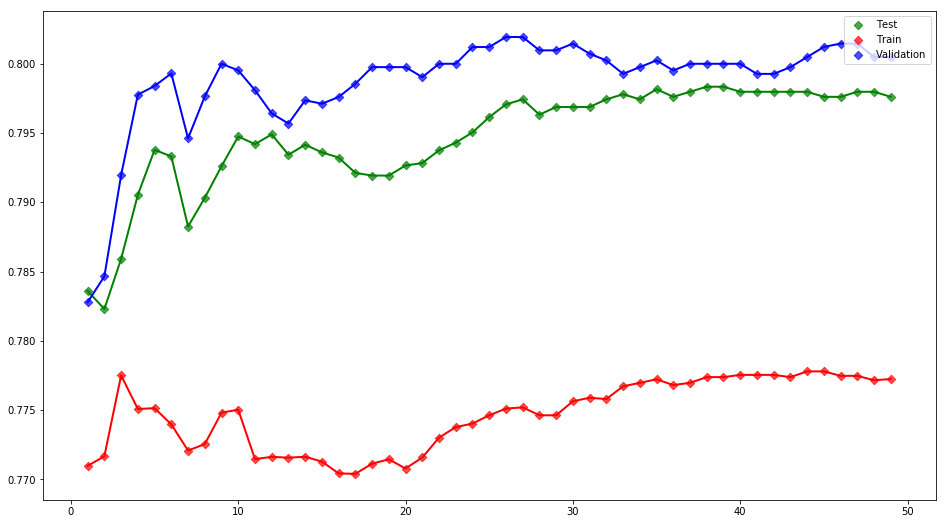

0.80193236715 26


In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression as LR

def ada3Estimator(c1):
    model = AdaBoostClassifier(base_estimator=LR(solver = 'newton-cg'), n_estimators=c1,random_state=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_true=y_test
    val=f1_score(y_true, y_pred)
    y_pred=model.predict(x_train)
    y_true=y_train
    val2=f1_score(y_true,y_pred)
    y_pred=model.predict(x_val)
    y_true=y_val
    val3=f1_score(y_true,y_pred)
    return (val,val2,val3)
y=[]
x=[]
y2=[]
y3=[]
maxi=0
for i in range(1,50):
    s=ada3Estimator(i)
    y.append(s[0])
    y2.append(s[1])
    y3.append(s[2])
    x.append(i)
    if maxi<s[2]:
        maxi=s[2]
        num=i
        
plt.figure(figsize = (16, 9))
plt.plot(x,y, 'g', zorder=1, lw=2)
plt.scatter(x,y,marker="D", c="g", alpha=0.7,label="Test")
plt.plot(x,y2, 'r', zorder=1, lw=2)
plt.scatter(x,y2,marker="D", c="r", alpha=0.7,label="Train")
plt.plot(x,y3, 'b', zorder=1, lw=2)
plt.scatter(x,y3,marker="D", c="b", alpha=0.7,label="Validation")
plt.legend(loc='upper right')
plt.show()    
print(maxi,num)

Obteniendo un valor maximo de 0.801 F1 Score con 26 estimadores de LRM, se observa que extrañamente el train test da un error mayor que el generado por validation set y test set.

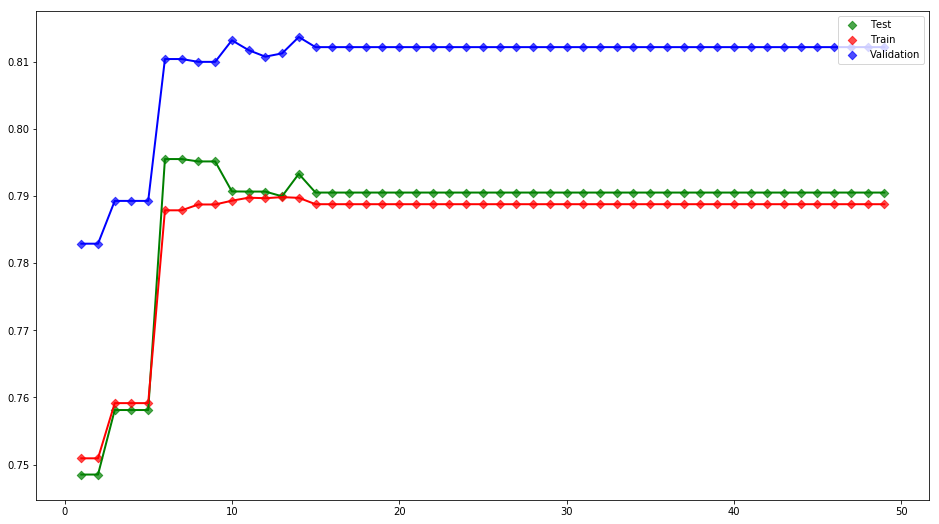

0.813743218807 14


In [114]:
from sklearn.naive_bayes import GaussianNB

def ada5Estimator(c1):
    model = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=c1,random_state=10,algorithm="SAMME")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_true=y_test
    val=f1_score(y_true, y_pred)
    y_pred=model.predict(x_train)
    y_true=y_train
    val2=f1_score(y_true,y_pred)
    y_pred=model.predict(x_val)
    y_true=y_val
    val3=f1_score(y_true,y_pred)
    return (val,val2,val3)
y=[]
x=[]
y2=[]
y3=[]
maxi=0
for i in range(1,50):
    s=ada5Estimator(i)
    y.append(s[0])
    y2.append(s[1])
    y3.append(s[2])
    x.append(i)
    if maxi<s[2]:
        maxi=s[2]
        num=i
        
plt.figure(figsize = (16, 9))
plt.plot(x,y, 'g', zorder=1, lw=2)
plt.scatter(x,y,marker="D", c="g", alpha=0.7,label="Test")
plt.plot(x,y2, 'r', zorder=1, lw=2)
plt.scatter(x,y2,marker="D", c="r", alpha=0.7,label="Train")
plt.plot(x,y3, 'b', zorder=1, lw=2)
plt.scatter(x,y3,marker="D", c="b", alpha=0.7,label="Validation")
plt.legend(loc='upper right')
plt.show()    
print(maxi,num)

Al realizar adaBoost en GaussianNB, se produce overfiting luego de 16 estimadores obteniendo un maximo de 0.813 en el test validation al realizar 14 estimadores, en este caso tambien ocurre que el F1 Score obtenido por el train es menor que el test y validation. 

# g)
Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random Forest, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos >Es posible implementar este criterio sobre una técnica de boost como lo es AdaBoost?
Grafico que tanto afecta n stimators o el otro.

Se elije el estimador que mejores resultados obtuvo, RandomForest con 33 árboles. Luego se calculan los resultados obtenidos al realizar un entrenamiento al disminuir en un atributo.